<a href="https://colab.research.google.com/github/mrcrchln/Sentiment-Analysis/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build web scraper and apply Machine Learning and Natural Language Processing techniques for sentiment analysis of google news

This script allows you to gather news articles related to a company, assess the sentiment of their titles, and calculate an average sentiment score to gauge the overall sentiment in the news. This can be useful for tracking public perception and sentiment about the company over time as well as identify negatvie outliers as part of a short due dilligence process.

In [1]:
pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=1909386676b955cff6aebc913340106065b79dd06405c9e75437923e5d44ca22
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [2]:
import feedparser
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import urllib.parse
from bs4 import BeautifulSoup

# Define the company name for analysis
company_name = "Aptiv"

# Encode the company name for the URL
encoded_company_name = urllib.parse.quote(company_name)

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment scores
title_sentiments = []
description_sentiments = []
dates = []
title_count = 0

# Fetch news articles from Google News RSS feed for the first 16 pages
for page in range(1, 17):
    rss_url = f"https://news.google.com/rss/search?q={encoded_company_name}&hl=en-US&gl=US&ceid=US:en&start={page}0"
    feed = feedparser.parse(rss_url)

    # Analyze sentiment for each news article in the current page
    for entry in feed.entries:
        title = entry.title
        description = entry.description
        date = entry.published

        # Remove the anchor tag from the description and extract the URL
        soup = BeautifulSoup(description, 'html.parser')
        anchors = soup.find_all('a')
        for anchor in anchors:
            anchor.extract()
        description = soup.get_text().strip()
        url = anchor.get('href')

        # Perform sentiment analysis on the title
        title_sentiment = sia.polarity_scores(title)
        title_sentiments.append(title_sentiment['compound'])
        dates.append(date)
        title_count += 1

        # Print the sentiment scores, URL, and date
        print(f"Title: {title}")
        print(f"Title Sentiment: {title_sentiment}")
        print(f"Source: {description}")
        print(f"URL: {url}")
        print(f"Date: {date}")
        print('---')

# Calculate average sentiment scores
avg_title_sentiment = sum(title_sentiments) / len(title_sentiments)

# Print average sentiment scores, the number of titles, and the average date
print(f"Average Title Sentiment: {avg_title_sentiment}")
print(f"Number of Titles: {title_count}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
Title: Is it Time to Dump Aptiv PLC (APTV) Stock After it Is Higher By 0.66% in a Week? - InvestorsObserver
Title Sentiment: {'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.3818}
Source: InvestorsObserver
URL: https://news.google.com/rss/articles/CBMigAFodHRwczovL3d3dy5pbnZlc3RvcnNvYnNlcnZlci5jb20vbmV3cy9zdG9jay11cGRhdGUvaXMtaXQtdGltZS10by1kdW1wLWFwdGl2LXBsYy1hcHR2LXN0b2NrLWFmdGVyLWl0LWlzLWhpZ2hlci1ieS0wLTY2LWluLWEtd2Vla9IBhAFodHRwczovL3d3dy5pbnZlc3RvcnNvYnNlcnZlci5jb20vbmV3cy9zdG9jay11cGRhdGUvYW1wL2lzLWl0LXRpbWUtdG8tZHVtcC1hcHRpdi1wbGMtYXB0di1zdG9jay1hZnRlci1pdC1pcy1oaWdoZXItYnktMC02Ni1pbi1hLXdlZWs?oc=5
Date: Thu, 27 Jul 2023 07:00:00 GMT
---
Title: Aptiv Completes the Acquisition of Intercable Automotive Solutions - PR Newswire
Title Sentiment: {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.1779}
Source: PR Newswire
URL: https://news.google.com/rss/articles/CBMiemh0dHBzOi8vd3d3LnBybmV3c3dpcmUuY29tL25ld3MtcmVsZWFzZXMvY

# Negative Only

In [4]:
import pandas as pd
from bs4 import BeautifulSoup

# Create empty lists to store the data
data = {
    'Title': [],
    'Title Sentiment': [],
    'Source': [],
    'URL': [],
    'Date': []
}

# Print only the negative sentiments
print("Negative Sentiments:")
for title_sentiment, entry in zip(title_sentiments, feed.entries):
    if title_sentiment < 0:
        title = entry.title

        # Remove the anchor tag from the description and extract the URL
        soup = BeautifulSoup(entry.description, 'html.parser')
        anchors = soup.find_all('a')
        for anchor in anchors:
            anchor.extract()
        description = soup.get_text().strip()

        url = entry.link
        date = entry.published

        print(f"Title: {title}")
        print(f"Title Sentiment: {title_sentiment}")
        print(f"Source: {description}")
        print(f"URL: {url}")
        print(f"Date: {date}")
        print('---')

        # Append data to the respective lists
        data['Title'].append(title)
        data['Title Sentiment'].append(title_sentiment)
        data['Source'].append(description)
        data['URL'].append(url)
        data['Date'].append(date)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Export the DataFrame to an Excel file
df.to_excel('neg_news.xlsx', index=False)

Negative Sentiments:
Title: Live Nation reports largest 2022 CEO-to-median employee pay ratio ... - S&P Global
Title Sentiment: -0.1027
Source: S&P Global
URL: https://news.google.com/rss/articles/CBMiqwFodHRwczovL3d3dy5zcGdsb2JhbC5jb20vbWFya2V0aW50ZWxsaWdlbmNlL2VuL25ld3MtaW5zaWdodHMvbGF0ZXN0LW5ld3MtaGVhZGxpbmVzL2xpdmUtbmF0aW9uLXJlcG9ydHMtbGFyZ2VzdC0yMDIyLWNlby10by1tZWRpYW4tZW1wbG95ZWUtcGF5LXJhdGlvLWFtb25nLXMtcC01MDAtNzcwMzkwNTfSAQA?oc=5
Date: Thu, 24 Aug 2023 19:34:55 GMT
---
Title: Magna says job cuts likely in case of labor strike - Reuters
Title Sentiment: -0.4019
Source: Reuters
URL: https://news.google.com/rss/articles/CBMibmh0dHBzOi8vd3d3LnJldXRlcnMuY29tL2J1c2luZXNzL2F1dG9zLXRyYW5zcG9ydGF0aW9uL21hZ25hLXNheXMtam9iLWN1dHMtbGlrZWx5LWNhc2UtbGFib3Itc3RyaWtlLTIwMjMtMDgtMDkv0gEA?oc=5
Date: Wed, 09 Aug 2023 07:00:00 GMT
---
Title: Is it Time to Dump Aptiv PLC (APTV) Stock After it Is Higher By 0.66% in a Week? - InvestorsObserver
Title Sentiment: -0.3818
Source: InvestorsObserver
URL: h

# Positive Only

In [6]:
import pandas as pd
from bs4 import BeautifulSoup

# Create empty lists to store the data
data = {
    'Title': [],
    'Title Sentiment': [],
    'Source': [],
    'URL': [],
    'Date': []
}

# Print only the positive sentiments
print("Positive Sentiments:")
for title_sentiment, entry in zip(title_sentiments, feed.entries):
    if title_sentiment > 0:
        title = entry.title

        # Remove the anchor tag from the description and extract the URL
        soup = BeautifulSoup(entry.description, 'html.parser')
        anchors = soup.find_all('a')
        for anchor in anchors:
            anchor.extract()
        description = soup.get_text().strip()

        url = entry.link
        date = entry.published

        print(f"Title: {title}")
        print(f"Title Sentiment: {title_sentiment}")
        print(f"Source: {description}")
        print(f"URL: {url}")
        print(f"Date: {date}")
        print('---')

        # Append data to the respective lists
        data['Title'].append(title)
        data['Title Sentiment'].append(title_sentiment)
        data['Source'].append(description)
        data['URL'].append(url)
        data['Date'].append(date)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Export the DataFrame to an Excel file
df.to_excel('pos_news.xlsx', index=False)

Positive Sentiments:
Title: Why Aptiv PLC (APTV) is a Top Value Stock for the Long-Term - Nasdaq
Title Sentiment: 0.4939
Source: Nasdaq
URL: https://news.google.com/rss/articles/CBMiWWh0dHBzOi8vd3d3Lm5hc2RhcS5jb20vYXJ0aWNsZXMvd2h5LWFwdGl2LXBsYy1hcHR2LWlzLWEtdG9wLXZhbHVlLXN0b2NrLWZvci10aGUtbG9uZy10ZXJt0gEA?oc=5
Date: Mon, 04 Sep 2023 13:40:00 GMT
---
Title: 3123 Shares in Aptiv PLC (NYSE:APTV) Acquired by Private Advisor ... - MarketBeat
Title Sentiment: 0.296
Source: MarketBeat
URL: https://news.google.com/rss/articles/CBMiSmh0dHBzOi8vd3d3Lm1hcmtldGJlYXQuY29tL2luc3RhbnQtYWxlcnRzL255c2UtYXB0di1zZWMtZmlsaW5nLTIwMjMtMDktMDUv0gEA?oc=5
Date: Tue, 05 Sep 2023 08:43:56 GMT
---
Title: Aptiv PLC Demonstrates Strong Financial Performance and Growth ... - Best Stocks
Title Sentiment: 0.8779
Source: Best Stocks
URL: https://news.google.com/rss/articles/CBMiSmh0dHBzOi8vYmVzdHN0b2Nrcy5jb20vYXB0aXYtcGxjLWRlbW9uc3RyYXRlcy1zdHJvbmctZmluYW5jaWFsLXBlcmZvcm1hbmMv0gEA?oc=5
Date: Mon, 04 Sep 2023 22:55:54 G

# Visualisation

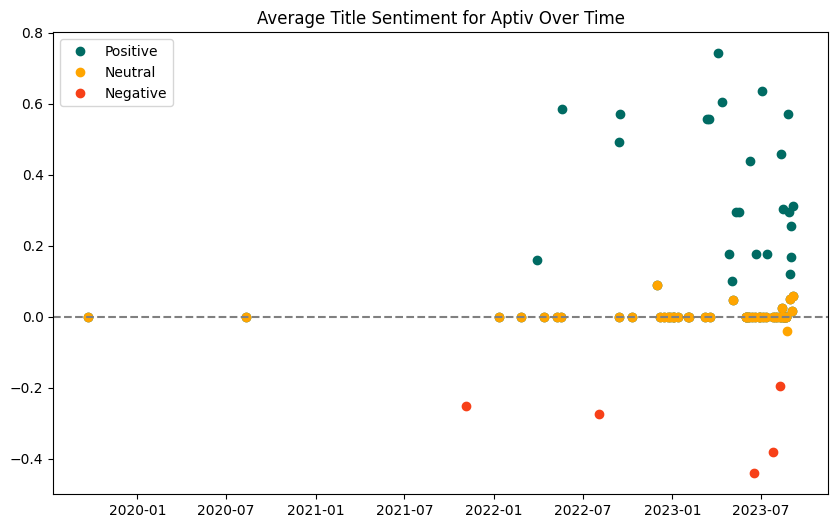

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas DataFrame with sentiment scores and dates
df = pd.DataFrame({'Date': dates, 'Title Sentiment': title_sentiments})
df['Date'] = pd.to_datetime(df['Date'])

# Calculate average sentiment scores per day
avg_sentiment_per_day = df.resample('D', on='Date')['Title Sentiment'].mean()

# Plot the average sentiment over time with different colors for positive, neutral, and negative data points
plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment_per_day[avg_sentiment_per_day >= 0].index, avg_sentiment_per_day[avg_sentiment_per_day >= 0].values, marker='o', linestyle='', color='#006B63', label='Positive')
plt.plot(avg_sentiment_per_day[(avg_sentiment_per_day >= -0.1) & (avg_sentiment_per_day < 0.1)].index, avg_sentiment_per_day[(avg_sentiment_per_day >= -0.1) & (avg_sentiment_per_day < 0.1)].values, marker='o', linestyle='', color='orange', label='Neutral')
plt.plot(avg_sentiment_per_day[avg_sentiment_per_day < -0.1].index, avg_sentiment_per_day[avg_sentiment_per_day < -0.1].values, marker='o', linestyle='', color='#F74018', label='Negative')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f'Average Title Sentiment for {company_name} Over Time')
plt.legend()
plt.show()